imports

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

load data

In [7]:
data = pd.read_csv('power_usage.csv')
data.columns =  ['timestamp', 'servername', 'active_connection', 'load', 'watt']
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values(['servername','timestamp'])
data.head()

,timestamp,servername,active_connection,load,watt
1,2025-01-06 21:16:11,dummy_server_1,0,0,0.01
4,2025-01-06 21:16:13,dummy_server_1,0,0,0.01
7,2025-01-06 21:16:15,dummy_server_1,0,0,0.00
10,2025-01-06 21:16:17,dummy_server_1,0,0,0.23
13,2025-01-06 21:16:19,dummy_server_1,0,0,0.27


scale data

In [8]:
scaler = MinMaxScaler()
data[['load', 'watt']] = scaler.fit_transform(data[['load', 'watt']])


create time series data

In [9]:
time_steps = 7
X, y = [], []
for i in range(len(data) - time_steps):
    sequence = data.iloc[i:i + time_steps][['load']].values
    target = data.iloc[i + time_steps]['watt']
    X.append(sequence)
    y.append(target)
X = np.array(X)
y = np.array(y)
X.shape, y.shape


((5323, 7, 1), (5323,))

split data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model

In [11]:
model = Sequential([
    Input(shape=(time_steps, 1)),
    LSTM(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

W0000 00:00:1736699945.227101   90277 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


train model

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0878 - mae: 0.2169 - val_loss: 0.0665 - val_mae: 0.1957
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0640 - mae: 0.1940 - val_loss: 0.0479 - val_mae: 0.1765
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0477 - mae: 0.1771 - val_loss: 0.0369 - val_mae: 0.1602
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0370 - mae: 0.1619 - val_loss: 0.0341 - val_mae: 0.1548
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0365 - mae: 0.1610 - val_loss: 0.0330 - val_mae: 0.1524
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0363 - mae: 0.1590 - val_loss: 0.0321 - val_mae: 0.1502
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0360 - mae: 0.1571 - val_loss: 0.0314 - val_mae: 0.1485
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0333 - mae: 0.1536 - val_loss: 0.0307 - val_mae: 0.1469
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

show results

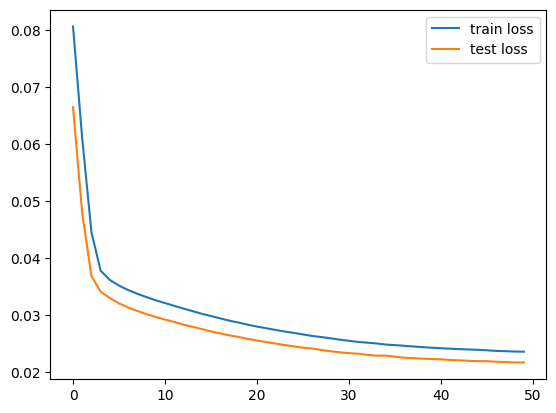

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

save model

In [ ]:
model.save('lstm_model.h5')